In [60]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [29]:
df = pd.read_csv('car_data.csv')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [31]:
df.head(n=1)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0


In [32]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [33]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [34]:
df.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [35]:
df.Selling_type.value_counts()

Dealer        195
Individual    106
Name: Selling_type, dtype: int64

In [36]:
df.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [37]:
df.Owner.value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Selling_Price'}>],
       [<AxesSubplot:title={'center':'Present_Price'}>,
        <AxesSubplot:title={'center':'Driven_kms'}>],
       [<AxesSubplot:title={'center':'Owner'}>, <AxesSubplot:>]],
      dtype=object)

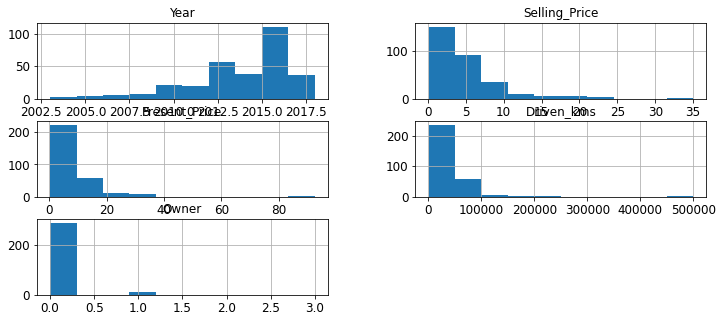

In [38]:
df.hist(figsize = (12,5))

In [39]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [40]:
numerical_values = df[['Year','Selling_Price','Present_Price','Driven_kms']]

In [41]:
numerical_values.corr()

,Year,Selling_Price,Present_Price,Driven_kms
Year,1.000000,0.236141,-0.047192,-0.524342
Selling_Price,0.236141,1.000000,0.878914,0.029187
Present_Price,-0.047192,0.878914,1.000000,0.203618
Driven_kms,-0.524342,0.029187,0.203618,1.000000


<AxesSubplot:>

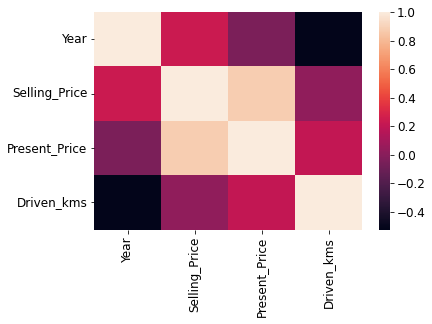

In [42]:
sns.heatmap(numerical_values.corr())

In [43]:
fuel_type=pd.get_dummies(df['Fuel_Type'])
print(fuel_type.columns)
fuel_type.head()

Index(['CNG', 'Diesel', 'Petrol'], dtype='object')


,CNG,Diesel,Petrol
0,0,0,1
1,0,1,0
2,0,0,1
3,0,0,1
4,0,1,0


In [44]:
df=pd.concat([df, fuel_type], axis=1)
df.head(n=2)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,CNG,Diesel,Petrol
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,0,0,1
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,0,1,0


In [45]:
selling_type=pd.get_dummies(df['Selling_type'])
df=pd.concat([df, selling_type], axis=1)
df.head(n=2)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,CNG,Diesel,Petrol,Dealer,Individual
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,0,0,1,1,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,0,1,0,1,0


In [46]:
transmission=pd.get_dummies(df['Transmission'])
df=pd.concat([df, transmission], axis=1)
df.head(n=2)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,CNG,Diesel,Petrol,Dealer,Individual,Automatic,Manual
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,0,0,1,1,0,0,1
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,0,1,0,1,0,0,1


In [48]:
df_final = df[['Year','Selling_Price','Present_Price','Driven_kms','Owner','CNG','Diesel','Petrol','Dealer','Individual','Automatic','Manual']]

In [55]:
y = df_final['Selling_Price']

In [61]:
from sklearn import preprocessing
d = preprocessing.normalize(df_final, axis=0)
names = df_final.columns
df_final = pd.DataFrame(d, columns=names)
df_final.head()

,Year,Selling_Price,Present_Price,Driven_kms,Owner,CNG,Diesel,Petrol,Dealer,Individual,Automatic,Manual
0,0.057650,0.028023,0.027976,0.029038,0.0,0.0,0.000000,0.064685,0.071611,0.0,0.0,0.061898
1,0.057621,0.039735,0.047745,0.046246,0.0,0.0,0.129099,0.000000,0.071611,0.0,0.0,0.061898
2,0.057736,0.060648,0.049297,0.007421,0.0,0.0,0.000000,0.064685,0.071611,0.0,0.0,0.061898
3,0.057564,0.023841,0.020770,0.005593,0.0,0.0,0.000000,0.064685,0.071611,0.0,0.0,0.061898
4,0.057650,0.038480,0.034382,0.045654,0.0,0.0,0.129099,0.000000,0.071611,0.0,0.0,0.061898


In [62]:
X = df_final.drop(['Selling_Price'], axis=1)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25)

In [68]:
mymodel = LinearRegression()


In [69]:
mymodel.fit(X_train, y_train)

LinearRegression()

In [70]:
print(mymodel)

LinearRegression()


In [71]:
print("intercept",mymodel.intercept_)
print("coeff",mymodel.coef_)

intercept -889.1273842156065
coeff [ 1.54534543e+04  8.55528193e+01 -4.22986522e+00 -3.35143182e+00
 -1.70076456e+00  1.18754711e+01 -5.79456232e+00  5.55833009e+00
 -7.53891258e+00  6.77768602e+00 -2.65332951e+00]


In [72]:
coefs=list(mymodel.coef_)
cols=list(X.columns)

In [81]:
results = pd.DataFrame(list(zip(cols, coefs)), columns=['feature','coeff'])
results 

,feature,coeff
0,Year,15453.454288
1,Present_Price,85.552819
2,Driven_kms,-4.229865
3,Owner,-3.351432
4,CNG,-1.700765
5,Diesel,11.875471
6,Petrol,-5.794562
7,Dealer,5.558330
8,Individual,-7.538913
9,Automatic,6.777686


In [77]:
y_preds = mymodel.predict(X_test)

In [78]:
rmse = sqrt(metrics.mean_squared_error(y_test, y_preds))
rmse

1.2858133030036178

In [79]:
avg_val = y_train.mean()
avg_val

4.798977777777778

In [80]:
r2 = metrics.r2_score(y_test, y_preds)
round(r2, 2)

0.92